<a href="https://colab.research.google.com/github/umslengineering/EE1108/blob/main/EE1108_ex6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Python Graphics

Valentine's heart curves are mathematical plots, often generated from equations like $(x^{2}+y^{2}-1)^{3}-x^{2}y^{3}=0$ or using polar coordinates (e.g., $r=1-\sin (\theta ))$

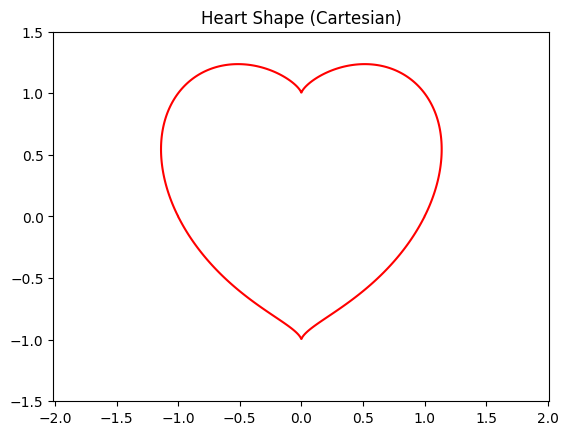

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of x and y values
x = np.linspace(-1.5, 1.5, 1000)
y = np.linspace(-1.5, 1.5, 1000)
X, Y = np.meshgrid(x, y)

# Cartesian heart equation
F = (X**2 + Y**2 - 1)**3 - X**2 * Y**3

# Plot the heart curve (contour where F=0)
plt.contour(X, Y, F, [0], colors='red')
plt.title("Heart Shape (Cartesian)")
plt.axis('equal')  # Equal aspect ratio
plt.show()

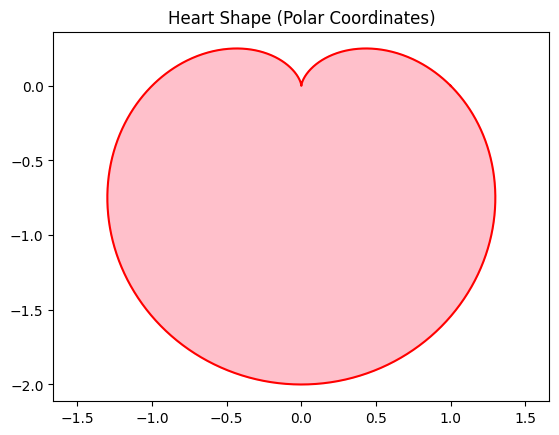

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create theta values
theta = np.linspace(0, 2 * np.pi, 1000)
r = 1 - np.sin(theta)

# Convert polar to Cartesian coordinates
x = r * np.cos(theta)
y = r * np.sin(theta)

# Plot the heart
plt.plot(x, y, color='red')
plt.fill(x, y, color='pink')  # Optional: fill color
plt.title("Heart Shape (Polar Coordinates)")
plt.axis('equal')
plt.show()

## SimplyGraphics.py

    To Draw Rectangle:
    x1 = np.array([-L/2,L/2,L/2,-L/2,-L/2])
    y1 = np.array([-W/2,-W/2,W/2,W/2,-W/2])

    This creates the vertices of the rectangle centered at the origin (0,0).
    Order of points is important for plotting:
	1.	Bottom-left
	2.	Bottom-right
	3.	Top-right
	4.	Top-left
	5.	Back to bottom-left (to close the rectangle)
	  x1 ranges from -L/2 to L/2 and y1 ranges from -W/2 to W/2.

    ---------
    Rotate the rectangle:
    x = a + np.cos(theta)*x1 - np.sin(theta)*y1
    y = b + np.sin(theta)*x1 + np.cos(theta)*y1

    This is a 2D rotation formula applied to each corner:

\begin{cases}
x_{\text{rotated}} = x_{\text{center}} + x_1 \cos\theta - y_1 \sin\theta \\
y_{\text{rotated}} = y_{\text{center}} + x_1 \sin\theta + y_1 \cos\theta
\end{cases}
	•	x1 and y1 are rotated by theta around the origin.
	•	a and b translate the rectangle so that it’s centered at (a, b).
	•	Result: x and y are arrays of the rectangle’s rotated coordinates, ready for plotting.

### Draw Star: 5-pointed star using trigonometry



1. Inner and outer radii

```r2 = r / (2 * (1 + np.sin(np.pi/10)))```

	•	r = radius of the outer 5 points of the star (distance from center to star tip)
	•	r2 = radius of the inner 5 points (distance from center to “valleys” between star tips)
	•	Formula ensures a visually proportional 5-pointed star, based on geometry:
	•	The factor np.sin(np.pi/10) comes from dividing the star angles (36° per outer point angle).

⸻

2. Compute the angles of 10 vertices

```tau = np.linspace(0, 2*np.pi, 11, endpoint=True) + np.pi/10 + theta*np.pi/180```

	•	np.linspace(0, 2*np.pi, 11) generates 11 angles from 0 to 2π (full circle).
	•	Why 11? To close the star, the first vertex repeats at the end.
	•	+ np.pi/10 = rotates star so the tip is pointing up (36° rotation).
	•	+ theta*np.pi/180 = additional rotation if you want to rotate the star by theta degrees.

After this, tau contains the angles for all 10 points (5 outer tips, 5 inner valleys) plus repetition for closure.

⸻

3. Compute x-coordinates
```
x = np.cos(tau)                 # Basic unit circle coordinates
x[0:11:2] = r * x[0:11:2]       # Outer vertices (even indices) scaled by r
x[1:11:2] = r2 * x[1:11:2]      # Inner vertices (odd indices) scaled by r2
x = x + a                        # Shift star to center a
```

	•	x[0:11:2] → selects every 2nd element starting from 0 = outer tips.
	•	x[1:11:2] → selects every 2nd element starting from 1 = inner points.
	•	Multiplying by r or r2 scales the points correctly.
	•	+ a shifts the star horizontally to center a.

⸻

4. Compute y-coordinates
```
y = np.sin(tau)                 # Basic unit circle coordinates
y[0:11:2] = r * y[0:11:2]       # Outer vertices
y[1:11:2] = r2 * y[1:11:2]      # Inner vertices
y = y + b                        # Shift vertically to center b
```
	•	Same logic as x.
	•	Now (x, y) contains 10 points of the star (5 tips + 5 inner points), ready for plotting.

Summary:
	•	Even indices → outer tips (radius r)
	•	Odd indices → inner valleys (radius r2)
	•	Angles (tau) ensure proper spacing and rotation
	•	(x + a, y + b) centers the star at (a,b)




In [ ]:
# SimpleGraphics.py
""" A module that supports the simple drawing of colored
rectangles, disks, stars, line segments, and text. """

import matplotlib.pyplot as plt
import numpy as np
from time import sleep as pause

# Built-in SimpleGraphics colors
YELLOW    = [1.0, 1.0, 0.0]
CYAN      = [0.0, 1.0, 1.0]
MAGENTA   = [1.0, 0.0, 1.0]
RED       = [1.0, 0.0, 0.0]
GREEN     = [0.0, 1.0, 0.0]
BLUE      = [0.0, 0.0, 1.0]
WHITE     = [1.0, 1.0, 1.0]
BLACK     = [0.0, 0.0, 0.0]
PURPLE    = [0.57, 0.17, 0.93]
DARKGRAY  = [0.33, 0.33, 0.33]
LIGHTGRAY = [0.67, 0.67, 0.67]
ORANGE    = [1.0, 0.50, 0.0]
PINK      = [1.0, 0.71, 0.80]


def MakeWindow(M, labels=True, bgcolor=WHITE):
    """
    Creates a window with x range -M<=x<=M and y range -M<=y<=M
    """
    M = int(M)

    plt.figure(figsize=(8, 8), dpi=80)

    ticks = np.linspace(-M, M, 2 * M + 1)
    plt.xticks(ticks)
    plt.yticks(ticks)

    plt.xlim(-M, M)
    plt.ylim(-M, M)

    axes = plt.gca()
    axes.set_facecolor(bgcolor)  # <-- Fixed here for modern matplotlib

    if not labels:
        axes.set_xticks([])
        axes.set_yticks([])

    axes.set_aspect('equal', adjustable='box')


def ShowWindow(duration=None):
    """
    Display the current window.
    """
    if duration is None:
        plt.show()
    else:
        plt.show(block=False)
        pause(duration)


def CloseWindow():
    """ Close all windows. """
    plt.close('all')


def DrawRect(a, b, L, W, theta=0.0, FillColor=None,
             EdgeColor=BLACK, EdgeWidth=1):

    L = float(L)
    W = float(W)
    theta = np.deg2rad(theta)

    x0 = np.array([-L/2, L/2, L/2, -L/2, -L/2])
    y0 = np.array([-W/2, -W/2, W/2, W/2, -W/2])

    x = a + np.cos(theta) * x0 - np.sin(theta) * y0
    y = b + np.sin(theta) * x0 + np.cos(theta) * y0

    if FillColor is None:
        plt.plot(x, y, color=EdgeColor, linewidth=EdgeWidth)
    else:
        plt.fill(x, y, facecolor=FillColor,
                 edgecolor=EdgeColor, linewidth=EdgeWidth)


def DrawDisk(a, b, r, FillColor=None, EdgeColor=BLACK, EdgeWidth=1):

    theta = np.linspace(0, 2 * np.pi, 256)
    x = a + r * np.cos(theta)
    y = b + r * np.sin(theta)

    if FillColor is None:
        plt.plot(x, y, color=EdgeColor, linewidth=EdgeWidth)
    else:
        plt.fill(x, y, facecolor=FillColor,
                 edgecolor=EdgeColor, linewidth=EdgeWidth)


def DrawStar(a, b, r, theta=0.0, FillColor=None,
             EdgeColor=BLACK, EdgeWidth=1):

    r2 = r / (2 * (1 + np.sin(np.pi / 10)))
    tau = np.linspace(0, 2 * np.pi, 11) + np.pi / 10 + np.deg2rad(theta)

    x = np.cos(tau)
    y = np.sin(tau)

    x[0::2] *= r
    y[0::2] *= r
    x[1::2] *= r2
    y[1::2] *= r2

    x += a
    y += b

    if FillColor is None:
        plt.plot(x, y, color=EdgeColor, linewidth=EdgeWidth)
    else:
        plt.fill(x, y, facecolor=FillColor,
                 edgecolor=EdgeColor, linewidth=EdgeWidth)


def DrawLineSeg(x0, y0, x1, y1, LineColor=BLACK, LineWidth=1):
    plt.plot([x0, x1], [y0, y1],
             color=LineColor, linewidth=LineWidth)


def DrawText(x, y, s, FontColor=BLACK, FontSize=10):
    plt.text(x, y, s, color=FontColor, fontsize=FontSize)


def Title(s, FontColor=BLACK, FontSize=18):
    plt.title(s, fontsize=FontSize, color=FontColor)


def DrawPoly(x, y, FillColor=None, EdgeWidth=1, EdgeColor=BLACK):

    u = list(x) + [x[0]]
    v = list(y) + [y[0]]

    if FillColor is None:
        plt.plot(u, v, linewidth=EdgeWidth, color=EdgeColor)
    else:
        plt.fill(u, v, facecolor=FillColor,
                 edgecolor=EdgeColor, linewidth=EdgeWidth)

Now we can plot images using Python!!

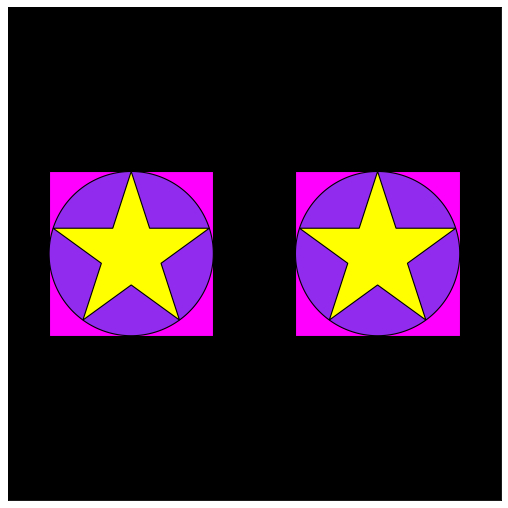

In [2]:
# Tile.py
""" Shows how to write a function that uses the
functions in simpleGraphics.
"""
from SimpleGraphics import *

def DrawTile(x,y,r,c1,c2,c3):
    """ Draws a square, a disk and a star (in that order) each with
    center (x,y). The disk and star have radius r and the sides
    of the square are tangent to the disk

    The rectangle has fill color c1, the disk has fill color c2, and
    the star has fill color c3.

    Precondition: x, y, and r are floats or ints, c1, c2, and c3 are
    rgb arrays.
    """
    DrawRect(x,y,2*r,2*r,FillColor=c1)
    DrawDisk(x,y,r,FillColor=c2)
    DrawStar(x,y,r,FillColor=c3)

#Application Script
if __name__ == '__main__':
    """ Applies DrawTile four times.
    """
    MakeWindow(6,bgcolor=BLACK,labels=False)
    DrawTile(3,0,2,MAGENTA,PURPLE,YELLOW)
    DrawTile(-3,0,2,MAGENTA,PURPLE,YELLOW)
    ShowWindow()

Plot Star Spangled Banner

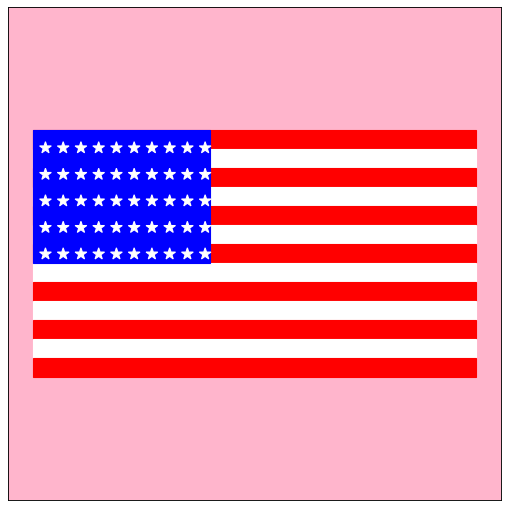

In [11]:
# US_Flag.py
from SimpleGraphics import *
import numpy as np

# Create window
MakeWindow(10, labels=False, bgcolor=PINK)

# Flag dimensions
flag_width = 18
flag_height = 10
stripe_height = flag_height / 13

# Draw stripes
for i in range(13):
    y = flag_height/2 - stripe_height/2 - i * stripe_height
    color = RED if i % 2 == 0 else WHITE
    DrawRect(0, y, flag_width, stripe_height, FillColor=color, EdgeColor=color)

# Blue canton
canton_width = flag_width * 0.4
canton_height = stripe_height * 7
DrawRect(-flag_width/2 + canton_width/2,
         flag_height/2 - canton_height/2,
         canton_width, canton_height,
         FillColor=BLUE, EdgeColor=BLUE)

# Draw stars (simplified 5x10 pattern)
rows = 5
cols = 10
star_r = 0.25

x_start = -flag_width/2 + canton_width * 0.1
y_start = flag_height/2 - canton_height * 0.15

dx = canton_width / cols
dy = canton_height / rows

for i in range(rows):
    for j in range(cols):
        x = x_start + j * dx
        y = y_start - i * dy
        DrawStar(x, y, star_r, FillColor=WHITE, EdgeColor=WHITE)

ShowWindow()